In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import csv
import random
import math
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from skimage.feature import hog
from skimage import color
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier



In [22]:
d1 = os.path.join(os.getcwd(), '2022Fheldout', '2022Fheldout')
d2 = os.path.join(os.getcwd(), '2022Fimgs', '2022Fimgs')
d3 = os.path.join(os.getcwd(), '2023Fimgs', '2023Fimgs')
d4 = os.path.join(os.getcwd(), '2023Simgs', 'S2023_imgs')
d5 = os.path.join(os.getcwd(), '2024Simgs', '2024Simgs')

imageDirectories = [d1, d2, d3, d4, d5]
all_lines = []
count = 0
# Iterate over each directory
for imageDirectory in imageDirectories:
    if count == 2:
        imgtype = ".jpg"
    else:
        imgtype = ".png"
    with open(os.path.join(imageDirectory, 'labels.txt'), 'r') as f:
        reader = csv.reader(f)
        lines = [[imageDirectory +"\\"+ row[0] + imgtype] + row[1:] for row in list(reader)]
        all_lines.extend(lines)
    count += 1

X = [line[0] for line in all_lines]  # Image paths
y = [line[1] for line in all_lines]  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

print('Number of training samples:', len(X_train))
print('Number of testing samples:', len(X_test))

Number of training samples: 610
Number of testing samples: 153


In [23]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_image = color.rgb2gray(img)
    img = cv2.resize(img, (64, 64))
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    gray_image = cv2.resize(gray_image, (64, 64))
    x, y, w, h = 12, 12, 40, 40
    hog_features = hog(gray_image, orientations=8, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2', feature_vector=True)
    hsv_image = cv2.GaussianBlur(hsv_image, (5, 5), 0)
    hsv_image = hsv_image.flatten()  
    hsv_image = hsv_image / 255.0  # norm 
    features = np.hstack([hog_features, hsv_image]) 
    return features
print(len(preprocess_image(X_train[0])))

13856


In [27]:
X_train_preprocessed = np.array([preprocess_image(x) for x in X_train])
X_test_preprocessed = np.array([preprocess_image(x) for x in X_test])
y_train = [int(label) for label in y_train]
y_test = [int(label) for label in y_test]
print("Unique labels in training set:", set(y_train))
print("Unique labels in test set:", set(y_test))
clf = svm.SVC(gamma='scale', kernel='linear')
# clf = DecisionTreeClassifier()
#clf = XGBClassifier()
# clf = RandomForestClassifier(
#         max_depth=5, n_estimators=10, max_features=1, random_state=42
#     )
clf = MLPClassifier(alpha=0.01, max_iter=1000, random_state=42)
# clf = GaussianNB()
# clf = KNeighborsClassifier(5)
# clf = AdaBoostClassifier(algorithm="SAMME", random_state=42)
clf.fit(X_train_preprocessed, y_train)

y_pred = clf.predict(X_test_preprocessed)

print(classification_report(y_test, y_pred))

Unique labels in training set: {0, 1, 2, 3, 4, 5}
Unique labels in test set: {0, 1, 2, 3, 4, 5}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        40
           2       0.98      0.98      0.98        44
           3       0.94      1.00      0.97        16
           4       0.94      1.00      0.97        16
           5       1.00      0.88      0.94        17

    accuracy                           0.96       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.96      0.96      0.96       153



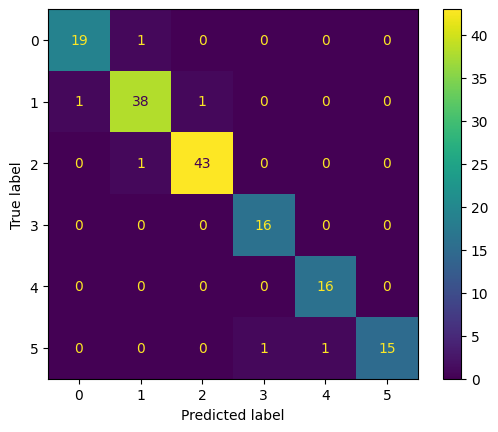

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [30]:
from joblib import dump, load

# Save the model
dump(clf, 'classifier_model.joblib')

['classifier_model.joblib']